# UFCFVQ-15-M Programming for Data Science (Autumn 2023)

## Student Id: 23020764

# Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [2]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import shapiro, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Allow display to use full width
pd.set_option('display.expand_frame_repr', False)

# Set up Matplotlib for Jupyter notebook integration
%matplotlib inline

# Configure Seaborn for better visualization defaults
sns.set(style="whitegrid")

# load the datasets to start the analysis
a = pd.read_csv('task2a.csv')
b = pd.read_csv('task2b.csv')


#print("a:\n", a.head())
#print("b:\n", b.head())

# Merge the two DataFrames based on common columns (Entity and Year)
merged_df = pd.merge(a, b, on=['Entity', 'Year'])

# Display the merged DataFrame
print(merged_df.head())

# Save the merged DataFrame to a new CSV file if needed
# merged_df.to_csv("merged_data.csv", index=False)



        Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  Anxiety disorders (%)  Depression (%)  Drug use disorders (%)  Alcohol use disorders (%)
0  Afghanistan  1990           0.160560              0.697779              0.101855               4.828830        4.071831                1.677082                   0.672404
1  Afghanistan  1991           0.160312              0.697961              0.099313               4.829740        4.079531                1.684746                   0.671768
2  Afghanistan  1992           0.160135              0.698107              0.096692               4.831108        4.088358                1.694334                   0.670644
3  Afghanistan  1993           0.160037              0.698257              0.094336               4.830864        4.096190                1.705320                   0.669738
4  Afghanistan  1994           0.160022              0.698469              0.092439               4.829423        4.099582        

### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Year                       6468 non-null   int64  
 2   Schizophrenia (%)          6468 non-null   float64
 3   Bipolar disorder (%)       6468 non-null   float64
 4   Eating disorders (%)       6468 non-null   float64
 5   Anxiety disorders (%)      6468 non-null   float64
 6   Depression (%)             6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 454.9+ KB
       Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  Anxiety disorders (%)  Depression (%)  Drug use disorders (%)  Alcohol use disorders (%)
count        6468.000000           6468.000000         

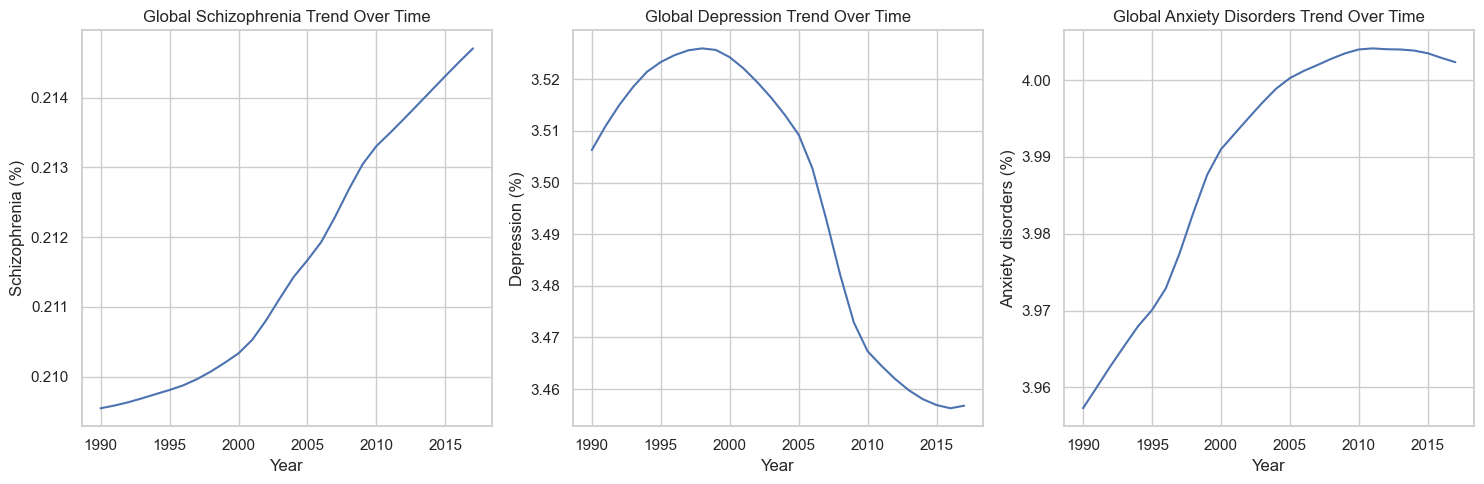

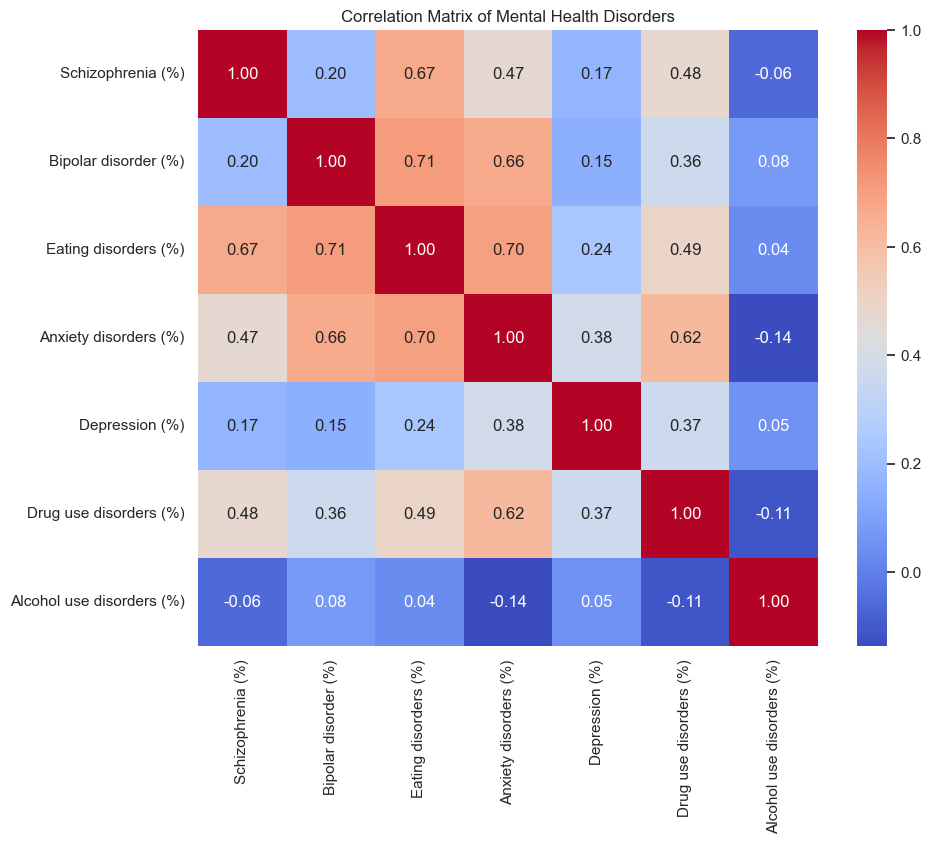

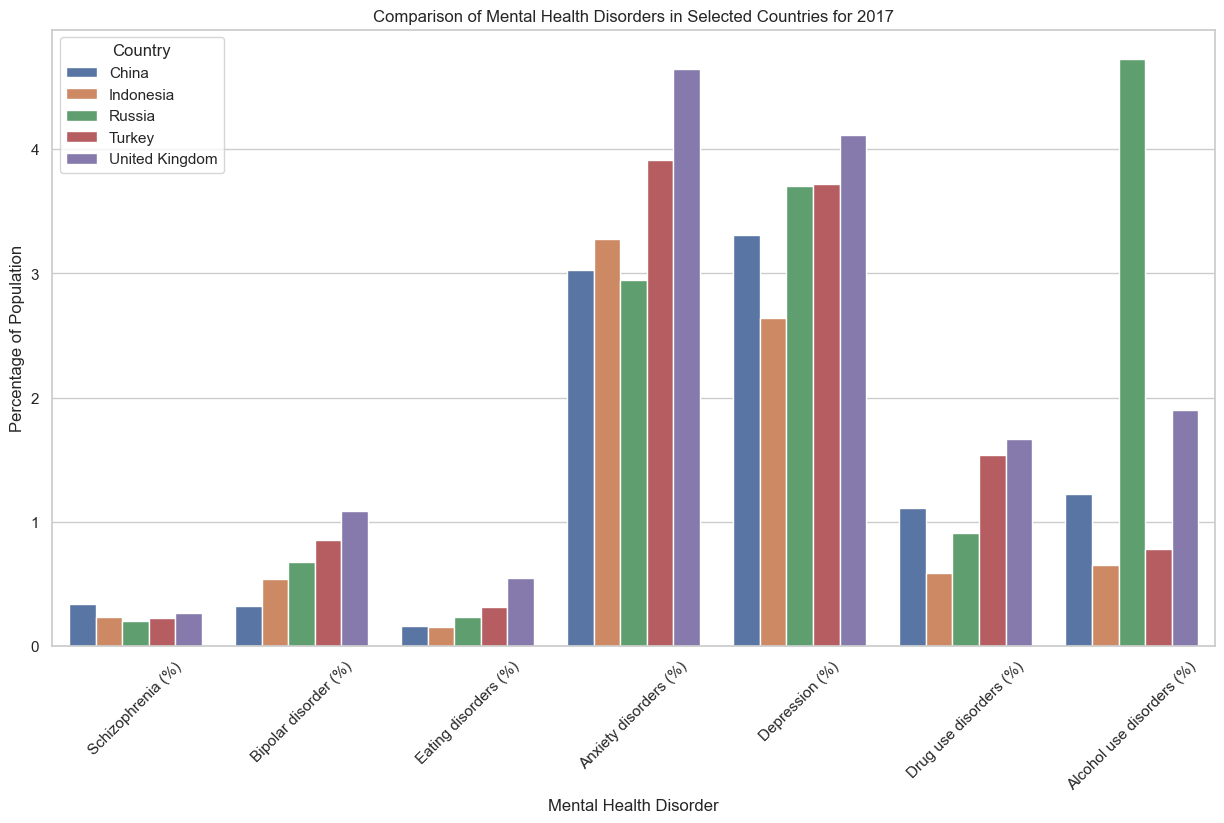

In [3]:
merged_df.info() # We have no null values
merged_df["Entity"].nunique() #231 unique country
merged_df["Year"].nunique() #28 years
mental_health_summary = merged_df.drop('Year', axis=1).describe()
print(mental_health_summary)

# 1st visualization: trend analysis to see how the rates of these disorders has changed over time. 

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting trends over time for a selection of disorders
plt.figure(figsize=(15, 5))

# Schizophrenia trend
plt.subplot(1, 3, 1)
sns.lineplot(x='Year', y='Schizophrenia (%)', data=merged_df, errorbar=None)
plt.title('Global Schizophrenia Trend Over Time')

# Depression trend
plt.subplot(1, 3, 2)
sns.lineplot(x='Year', y='Depression (%)', data=merged_df, errorbar=None)
plt.title('Global Depression Trend Over Time')

# Anxiety disorders trend
plt.subplot(1, 3, 3)
sns.lineplot(x='Year', y='Anxiety disorders (%)', data=merged_df, errorbar=None)
plt.title('Global Anxiety Disorders Trend Over Time')

plt.tight_layout()
plt.show()


# 2nd visualization: correlation analysis to see if there are any strong correlations between different disorders to check whether certain disorders tend to occur together more frequently. 

# Calculating the correlation matrix
correlation_matrix = merged_df.iloc[:, 2:].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mental Health Disorders')
plt.show()


# 3rd visualization: compare the rates of disorders across different countries after selecting a few countries and create a comparative visualization for a specific year to provide insight into geographical variations in mental health issues

# Selecting a specific year for comparison - using the most recent year available in the dataset
recent_year = merged_df['Year'].max()

# Filtering data for the selected year
data_recent_year = merged_df[merged_df['Year'] == recent_year]

# Selecting a few countries for comparison
selected_countries = ['Turkey', 'United Kingdom', 'Indonesia', 'China', 'Russia']

# Filtering data for the selected countries
data_selected_countries = data_recent_year[data_recent_year['Entity'].isin(selected_countries)]

# Melting the dataset for better visualization
data_melted = data_selected_countries.melt(id_vars=['Entity'], value_vars=['Schizophrenia (%)', 'Bipolar disorder (%)', 
                                                                            'Eating disorders (%)', 'Anxiety disorders (%)', 
                                                                            'Depression (%)', 'Drug use disorders (%)', 
                                                                            'Alcohol use disorders (%)'],
                                           var_name='Disorder', value_name='Percentage')

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='Disorder', y='Percentage', hue='Entity', data=data_melted)
plt.xticks(rotation=45)
plt.title(f'Comparison of Mental Health Disorders in Selected Countries for {recent_year}')
plt.ylabel('Percentage of Population')
plt.xlabel('Mental Health Disorder')
plt.legend(title='Country')
plt.show()


##### **1st visualization:** Trend analysis to see how the rates of these disorders has changed over time. 

The three graphs in the first visualization above show the global trends over time for Schizophrenia, Depression, and Anxiety Disorders, respectively. 
- **Schizophrenia Trend:** The percentage of the population with schizophrenia appears relatively stable over time. This could suggest effective management or a consistent rate of diagnosis across the years. 
- **Depression Trend:** There seems to be a gradual decrease in the rates of depression over the years. This could indicate a rising awareness in mental health issues resolving in better identify wrong diagnosis.
- **Anxiety Disorders Trend:** It show an upward trend. This might reflect increased stress levels in modern life or better recognition and diagnosis of these conditions.

##### **2nd visualization:** Correlation analysis to see if there are any strong correlations between different disorders to check whether certain disorders tend to occur together more frequently. 

- **Depression and anxiety disorders** are highly correlated as expected in accordance with clinical observations.
- **Drug use disorders and alcohol use disorders** have moderate positive correlations. 
- **Schizophrenia** show lower correlations with other disorders in general since it has distinct characteristics or risk factors.

##### **3rd visualization:** Comparasion of the rates of disorders across different countries after selecting a few countries and create a comparative visualization for a specific year to provide insight into geographical variations in mental health issues.

Each country shows a unique pattern in the rates of different disorders. This reflects the influence of cultural, economic, and healthcare system differences. 
- The UK shows relatively higher percentages in disorders like depression and anxiety. This might be indicative of higher awareness and diagnosis rates or bad weather. 
- Russia also showing a significant percentage in alcohol use disorders showing the cultural affects. 
- Indonesia and China appear to have lower reported percentages in most disorders compared to others. This could be due to varying levels of awareness, reporting practices, or actual rates.

#### **Selection of trend to investigate further:**

Even though there are more correlated diseases in the corelation matrix, I decided to investigate anxiety and depression disorders trends. The fact that these two mental health issues are trending in opposite directions is quite interesting since these two mental health illnesses frequently co-occur. It makes me wonder what the underlying causes might be that impacts these patterns in different directions. 

Both depression and anxiety have significant impacts on public health, quality of life, and economic costs. Understanding why one is increasing while the other is decreasing could lead to better-targeted health interventions, policies, and resource allocation. It is worth to mention depression also increasing in the early years then contunies to decrease.

First reason comes to mind for these trends, the public's perception of these disorders, their diagnosis, and their course of treatment may be improved over time. For example, the decline in depression rates may be explained by improved diagnosis and treatment, whereas the rise in anxiety may be because of improved diagnostic standards or higher levels of stress in society as a whole.

Before trying to understand the reasons behind it, we first must decide if there is a significant correlation between these opposite trends or if they are happening randomly.



### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

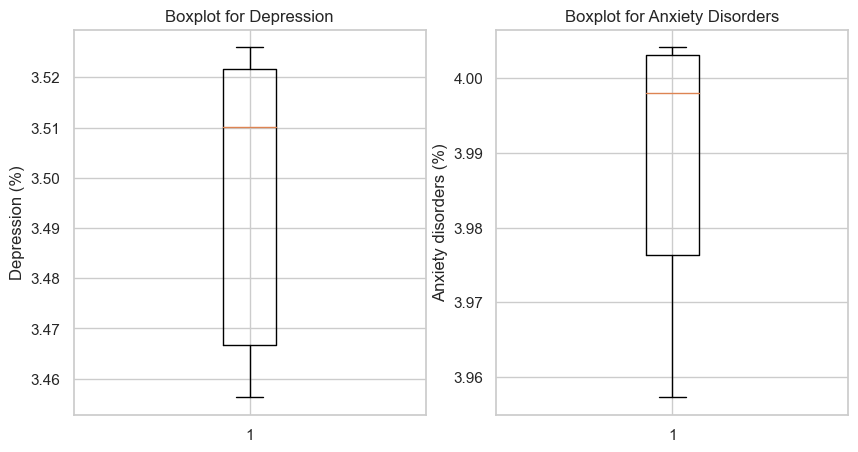

In [4]:
# Extracting yearly global average data for depression and anxiety disorders
depression_data = merged_df.groupby('Year')['Depression (%)'].mean().reset_index()
anxiety_data = merged_df.groupby('Year')['Anxiety disorders (%)'].mean().reset_index()


# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers for depression and anxiety disorders
outliers_depression = detect_outliers_iqr(depression_data, 'Depression (%)')
outliers_anxiety = detect_outliers_iqr(anxiety_data, 'Anxiety disorders (%)')

outliers_depression, outliers_anxiety

# Boxplot for Depression
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(depression_data['Depression (%)'])
plt.title('Boxplot for Depression')
plt.ylabel('Depression (%)')

# Boxplot for Anxiety Disorders
plt.subplot(1, 2, 2)
plt.boxplot(anxiety_data['Anxiety disorders (%)'])
plt.title('Boxplot for Anxiety Disorders')
plt.ylabel('Anxiety disorders (%)')

plt.show()


**The Interquartile Range (IQR) method:**

The Interquartile Range (IQR) method is a robust statistical technique used for outlier detection. It represents the middle 50% of the data. It involves the calculation of the range between the first quartile (Q1) and the third quartile (Q3). The interquartile range is then determined as the difference between Q3 and Q1. Outliers are identified as data points falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is effective in identifying data points that deviate significantly from the central tendency of the dataset.

The IQR method is advantageous in scenarios where the dataset is not normally distributed. Depression and anxiety data is not normally distributed as proven below at FR10 part with shapiro test. That is why the IQR method is used to identify outliers. 

No outliers were identified in the yearly global averages for both depression and anxiety disorders. Boxplots also agrees with this conclusion. No outliers on sight. This outcome suggests that the data for these trends is relatively consistent, without extreme variations that fall outside the range expected based on the IQR criteria.

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend


A moderate relationship between depression and anxiety rates is assumed. Is this statistically significant and did it not happen by chance? We need to test it.
Assuming that there is no association at all as the null hypothesis, any significant discovery (denoted by a low p-value) can be read as proof that the relationship observed in the sample is likely to exist in the population that the sample was taken from.
In this case, the null and alternative hypothesis would be:

<div align="center"><font size=2.5><b><i>H</i><sub>0</sub>: There is no relationship between the two variables, i.e., the rate of depression is not related to the rate of anxiety disorders.
</b></font></div>

<div align="center"><font size=2.5><b><i>H</i><sub>a</sub>: There is a significant correlation exists, indicating that these disorders might co-occur or influence each other.
</b></font></div>

To reject our hypothesis, we will use the **p-value**. Since this value is defined as:

<div align="center"><font size=2.5>p-value = Pr(the observed result, given <i>H</i><sub>0</sub> is true).</font></div>


### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

In [4]:
# To check this hypothesis, we will use the p-value. Since this value is defined as: Probability of the H0 is True

# First we need to check if the data normally distributed to decide the method we are going to use to detect the correlation.

# Shapiro-Wilk Test for normality
def check_normality(data, column_name):
    stat, p = shapiro(data[column_name])
    print(f'Shapiro-Wilk Test for {column_name}: Statistic={stat:.3f}, p-value={p:.3f}')
    
    # Interpretation
    alpha = 0.05
    if p > alpha:
        print(f'The data in {column_name} looks normally distributed (fail to reject H0).')
    else:
        print(f'The data in {column_name} does not look normally distributed (reject H0).')


check_normality(merged_df, 'Depression (%)')
check_normality(merged_df, 'Anxiety disorders (%)')

# Calculating the average global rate per year for both disorders
average_depression_per_year = merged_df.groupby('Year')['Depression (%)'].mean()
average_anxiety_per_year = merged_df.groupby('Year')['Anxiety disorders (%)'].mean()

# Performing Spearman correlation test
correlation_coefficient, p_value = spearmanr(average_depression_per_year, average_anxiety_per_year)

correlation_coefficient, p_value


Shapiro-Wilk Test for Depression (%): Statistic=0.968, p-value=0.000
The data in Depression (%) does not look normally distributed (reject H0).
Shapiro-Wilk Test for Anxiety disorders (%): Statistic=0.894, p-value=0.000
The data in Anxiety disorders (%) does not look normally distributed (reject H0).


c:\Users\deniz\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(-0.7389162561576355, 7.101207498973145e-06)

**A Spearman correlation test** is used to assess the strength and direction of the relationship between the trends of depression and anxiety disorders since the data are not normally distributed. This test is appropriate for quantifying the degree of linear relationship between two continuous variables.

**Correlation Coefficient:** The correlation coefficient of -0.7389 suggests a strong negative correlation between the trends of depression and anxiety disorders. This can be explained as earlier years, since there wasn't mental awareness as much as now, anxiety patients were mistakenly diaognised with depression. As improvements started, correct diagnoses showed the some depression patients were actually anxiety patients.

**P-value:** The p-value is significantly low (far below the standard threshold of 0.05), indicating that the correlation is statistically significant.

**Reject the null hypothesis** (H0) and conclude that there is a statistically significant correlation between the trends of depression and anxiety disorders on a global scale, as the rate of one disorder increases, the other tends to decrease.

Data provides strong evidence of a significant negative correlation between the trends of depression and anxiety disorders. This means that the trends of these disorders are related to each other in a significant way, and they move in opposite directions over time. Further sociological research is significant to better understand the reasons behind this correlaton. 
